In [45]:
import pandas as pd
import seaborn as sb

In [67]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [68]:
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1610,1611,15758726,Chiemeka,588,France,Female,24.0,0,0.00,2,1.0,1.0,140586.08,0
1041,1042,15692317,Craig,722,France,Male,30.0,5,0.00,2,1.0,0.0,166376.54,0
4316,4317,15720774,P'eng,850,Spain,Male,44.0,7,89118.26,1,1.0,0.0,104240.77,1
3397,3398,15691624,Chidiebere,820,France,Male,33.0,2,132150.26,2,1.0,0.0,23067.97,0
1996,1997,15755678,Kovalyov,534,France,Male,62.0,2,0.00,2,0.0,0.0,42763.12,1
3789,3790,15765415,King,609,Spain,Female,45.0,4,89122.30,1,1.0,1.0,199256.98,0
7622,7623,15796413,Green,794,France,Male,46.0,6,0.00,2,1.0,0.0,195325.74,0
3267,3268,15624755,Pepper,707,Germany,Female,40.0,3,109628.44,1,1.0,0.0,189366.03,0
9807,9808,15594915,Crist,649,France,Female,36.0,8,0.00,2,0.0,1.0,109179.89,0
6866,6867,15664506,Goodwin,675,Spain,Male,32.0,8,197436.82,1,1.0,1.0,52710.70,0


In [83]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,9999.000000,10000.000000,10000.000000,10000.000000,9999.000000,9999.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.923095,5.012800,76485.889288,1.530200,0.705471,0.515052,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487635,2.892174,62397.405202,0.581654,0.455854,0.499798,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [70]:
# check null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [71]:
# check duplicates
data[data.duplicated()]



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [80]:
data.drop_duplicates(inplace=True)

## Dependent Variable

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [75]:
data['Exited'].value_counts(dropna=False)

0    7963
1    2037
Name: Exited, dtype: int64

In [74]:
data['Exited'].value_counts(dropna=False, normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

## Numerical Columns Analysis

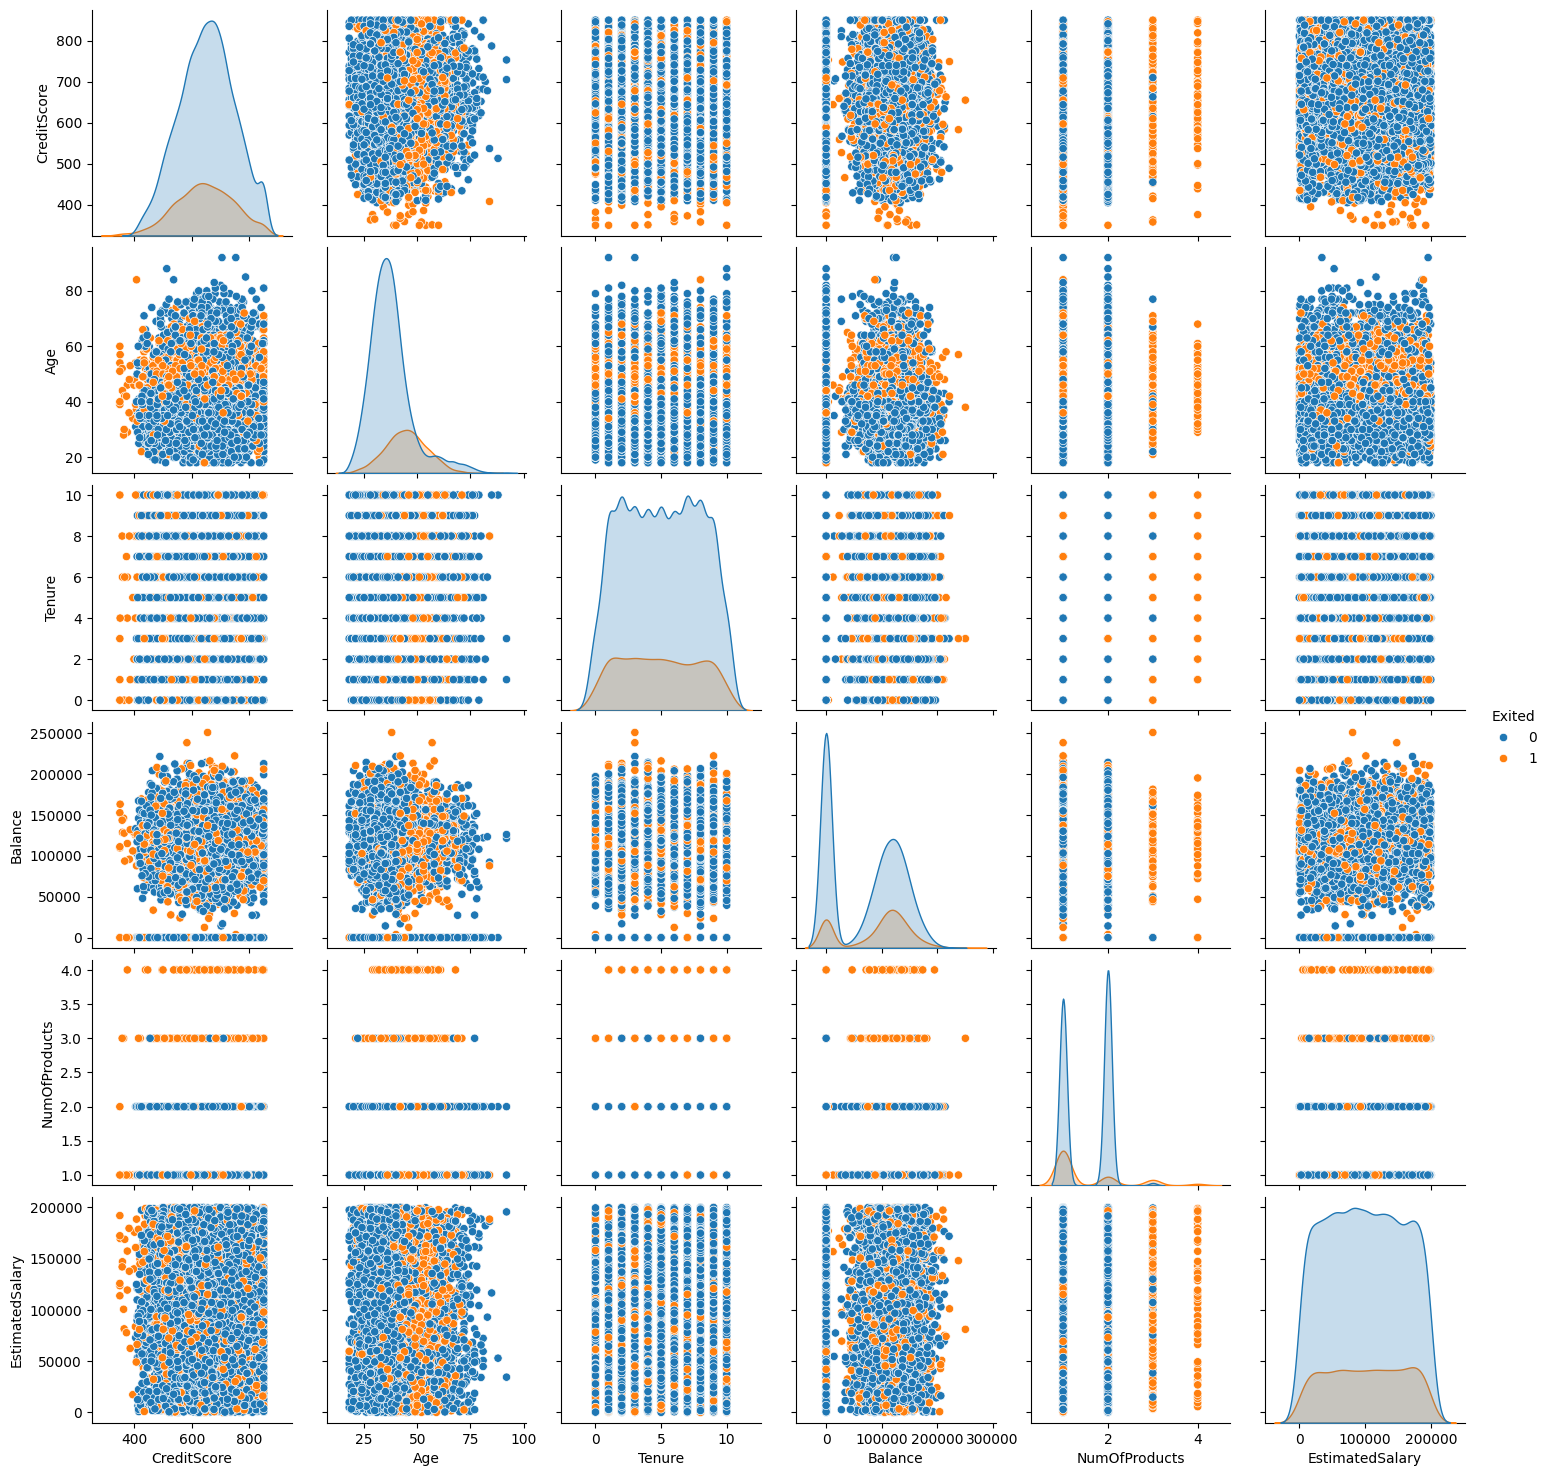

In [7]:
numerical_cols_exited = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
sb.pairplot(data[numerical_cols_exited], hue="Exited")


<Axes: >

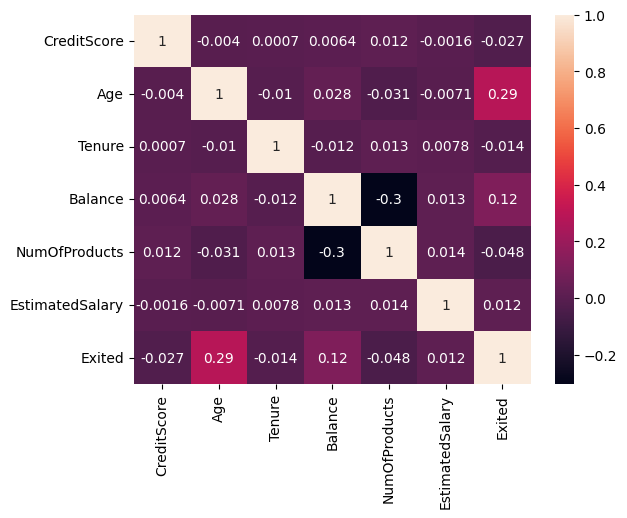

In [8]:
cm = data[numerical_cols_exited].corr()
sb.heatmap(cm, annot=True)

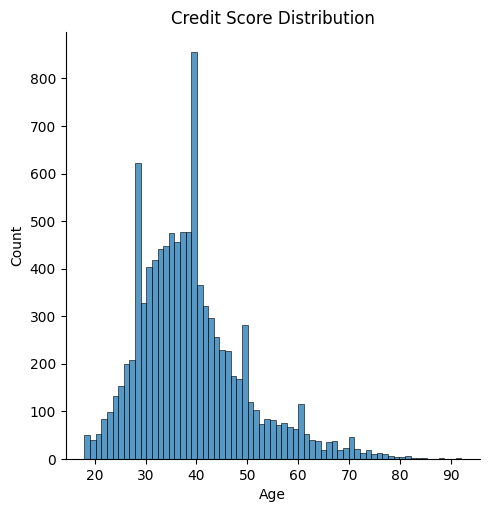

In [9]:
sb.displot(data, x="Age").set(title='Credit Score Distribution')

<Axes: xlabel='Age', ylabel='Count'>

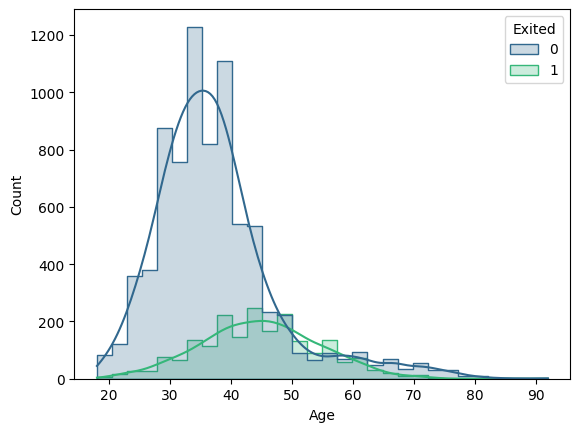

In [10]:
sb.histplot(data=data, x='Age', hue='Exited', bins=30, kde=True, palette='viridis', element='step')

<Axes: xlabel='age_bins', ylabel='count'>

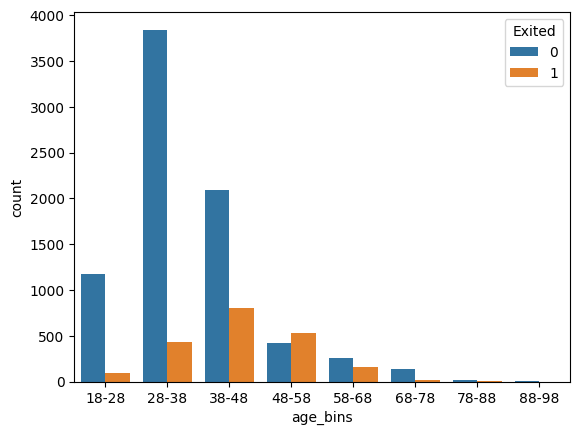

In [11]:
    bins = [18, 28, 38, 48, 58, 68, 78, 88, 98]
    labels = ['18-28', '28-38', '38-48', '48-58', '58-68', '68-78', '78-88', '88-98']
    data['age_bins'] = pd.cut(data['Age'], bins=bins, labels=labels)

    sb.countplot(x='age_bins', hue='Exited', data=data)

In [12]:
age_crosstab = pd.crosstab([data['age_bins']],
                             data['Exited'], margins = False)

age_crosstab['%Exited'] = round((age_crosstab[1] / (age_crosstab[0] + age_crosstab[1])) * 100, 2)

display(age_crosstab)

Exited,0,1,%Exited
age_bins,,,
18-28,1177,94,7.40
28-38,3842,429,10.04
38-48,2091,804,27.77
48-58,422,532,55.77
58-68,255,160,38.55
68-78,138,16,10.39
78-88,16,1,5.88
88-98,2,0,0.00


[Text(0.5, 1.0, 'Credit Score Distribution')]

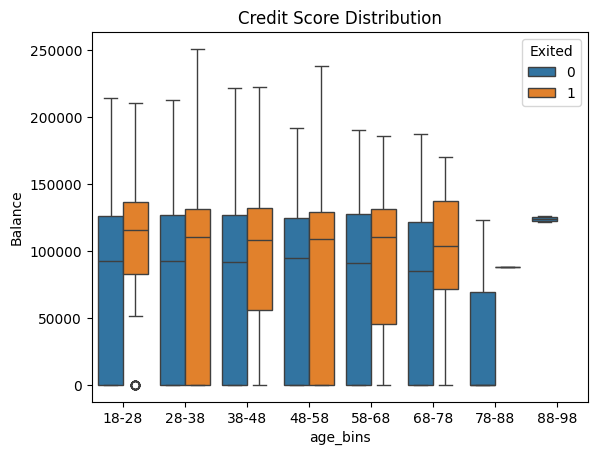

In [13]:
sb.boxplot(data, y="Balance", x='age_bins', hue='Exited').set(title='Credit Score Distribution')

[Text(0.5, 1.0, 'Credit Score Distribution - Without Zero Balance')]

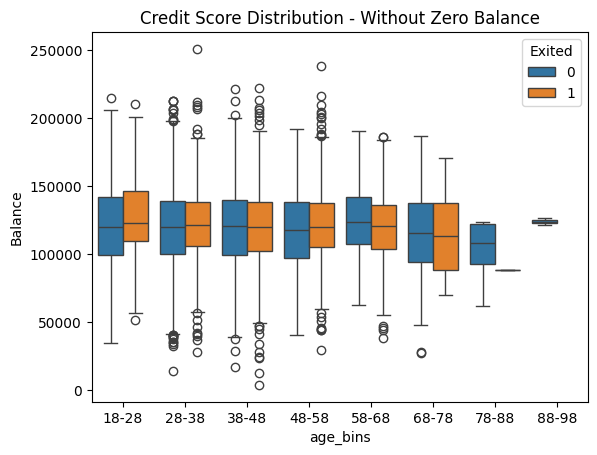

In [14]:
sb.boxplot(data[data['Balance'] != 0], y="Balance", x='age_bins', hue='Exited').set(title='Credit Score Distribution - Without Zero Balance')

[Text(0.5, 1.0, 'Credit Score Distribution')]

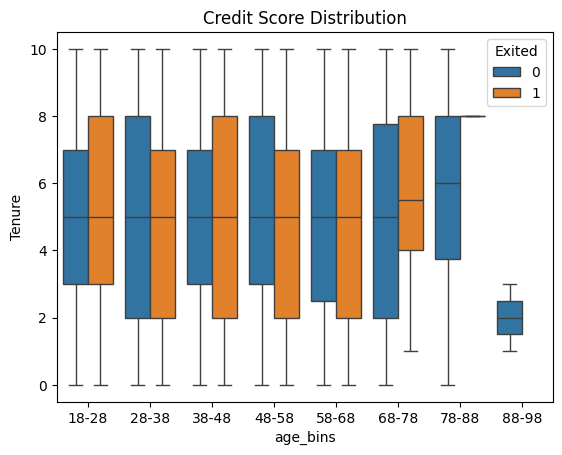

In [15]:
sb.boxplot(data, y="Tenure", x='age_bins', hue='Exited').set(title='Credit Score Distribution')

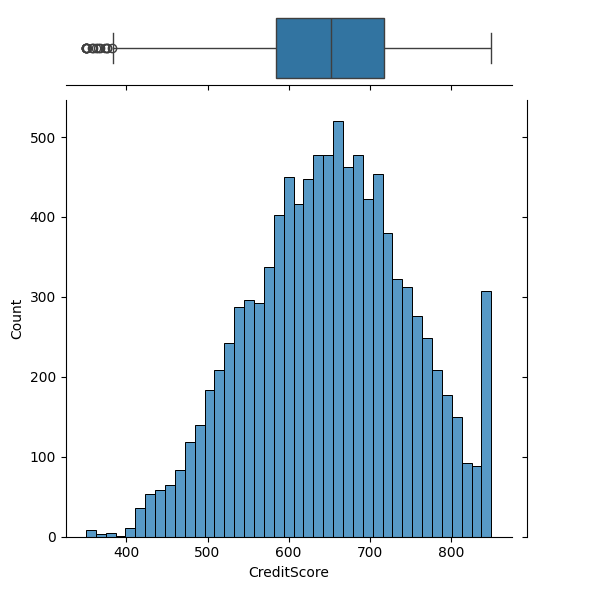

In [16]:
g = sb.JointGrid(data=data, x="CreditScore")
g.plot_joint(sb.histplot)
g.plot_marginals(sb.boxplot)

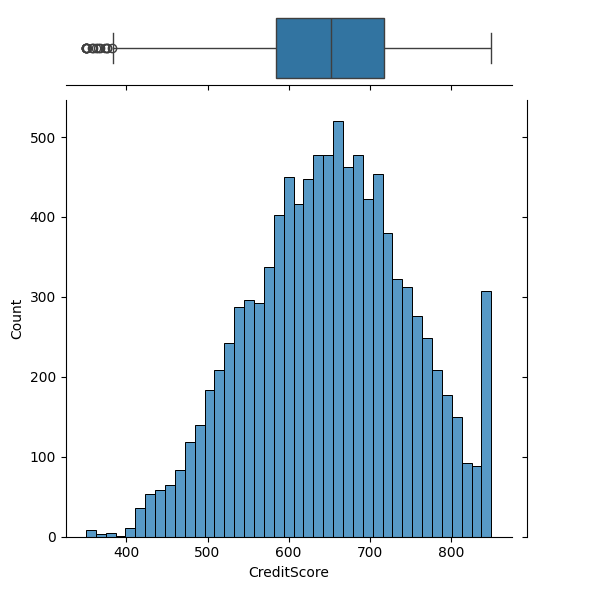

In [17]:
g = sb.JointGrid(data=data, x="CreditScore")
g.plot_joint(sb.histplot)
g.plot_marginals(sb.boxplot)

0    7964
1    2038
Name: Exited, dtype: int64

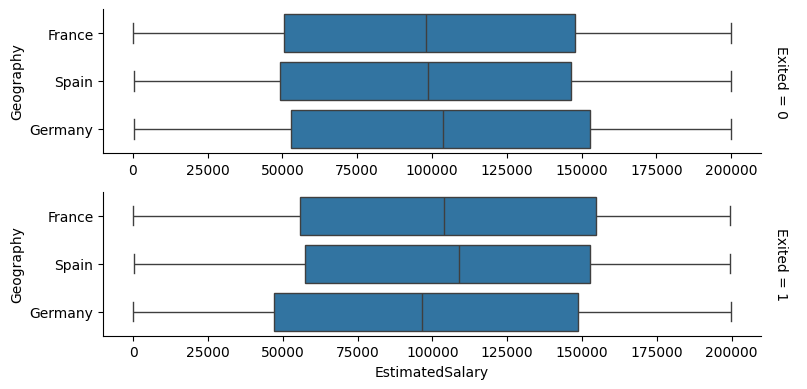

In [19]:
g = sb.catplot(
    data=data,
    x="EstimatedSalary", y="Geography", row="Exited",
    kind="box",
    sharex=False, margin_titles=True,
    height=2, aspect=4,
)


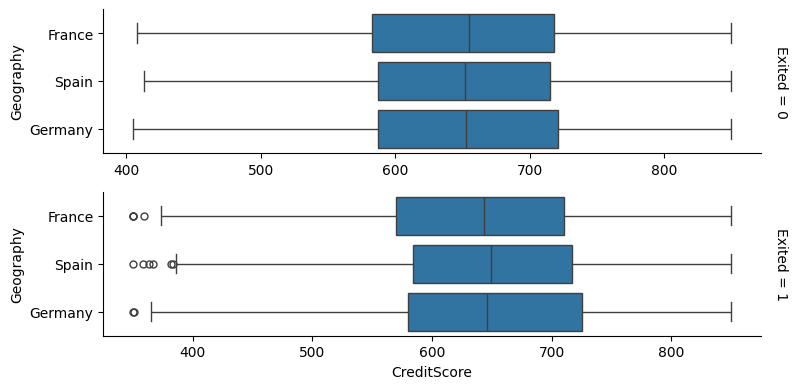

In [20]:
g = sb.catplot(
    data=data,
    x="CreditScore", y="Geography", row="Exited",
    kind="box",
    sharex=False, margin_titles=True,
    height=2, aspect=4,
)

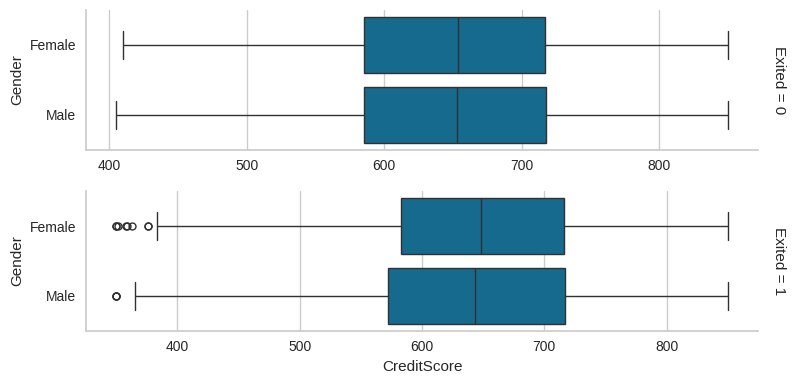

In [89]:
g = sb.catplot(
    data=data,
    x="CreditScore", y="Gender", row="Exited",
    kind="box",
    sharex=False, margin_titles=True,
    height=2, aspect=4,
)

## Variables Categoricas

In [84]:
country_crosstab = pd.crosstab([data['Geography']],
                             data['Exited'], margins = False)

country_crosstab['%Exited'] = round((country_crosstab[1] / (country_crosstab[0] + country_crosstab[1])) * 100, 2)

display(country_crosstab)

Exited,0,1,%Exited
Geography,,,
France,4203,810,16.16
Germany,1695,814,32.44
Spain,2064,413,16.67


In [85]:
isactive_crosstab = pd.crosstab([data['IsActiveMember']],
                             data['Exited'], margins = False)

isactive_crosstab['%Exited'] = round((isactive_crosstab[1] / (isactive_crosstab[0] + isactive_crosstab[1])) * 100, 2)

display(isactive_crosstab)

Exited,0,1,%Exited
IsActiveMember,,,
0.0,3547,1302,26.85
1.0,4415,735,14.27


In [86]:
creditcard_crosstab = pd.crosstab([data['HasCrCard']],
                             data['Exited'], margins = False)

creditcard_crosstab['%Exited'] = round((creditcard_crosstab[1] / (creditcard_crosstab[0] + creditcard_crosstab[1])) * 100, 2)

display(creditcard_crosstab)

Exited,0,1,%Exited
HasCrCard,,,
0.0,2332,613,20.81
1.0,5630,1424,20.19


In [88]:
gender_crosstab = pd.crosstab([data['Gender']],
                             data['Exited'], margins = False)

gender_crosstab['%Exited'] = round((gender_crosstab[1] / (gender_crosstab[0] + gender_crosstab[1])) * 100, 2)

display(gender_crosstab)

Exited,0,1,%Exited
Gender,,,
Female,3404,1139,25.07
Male,4559,898,16.46


## Model

In [32]:
cols_to_use = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
categorical_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']


In [40]:
from pycaret.classification import *
s = setup(
        data[cols_to_use],
        target = 'Exited',
        session_id = 123,
        numeric_imputation='mean',
        normalize=True,
        categorical_imputation='mode',
        fix_imbalance=True,
        numeric_features=numeric_cols,
        categorical_features=categorical_cols
    )

,Description,Value
0,Session id,123
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10002, 11)"
4,Transformed data shape,"(14149, 16)"
5,Transformed train set shape,"(11148, 16)"
6,Transformed test set shape,"(3001, 16)"
7,Numeric features,5
8,Categorical features,5
9,Rows with missing values,0.0%


In [41]:
best = s.compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.7450,0.0000,0.7435,0.4300,0.5437,0.3846,0.4132,0.3060
ridge,Ridge Classifier,0.7636,0.0000,0.7407,0.4515,0.5609,0.4120,0.4357,0.2250
lda,Linear Discriminant Analysis,0.7636,0.0000,0.7407,0.4515,0.5609,0.4120,0.4357,0.2830
lr,Logistic Regression,0.7697,0.0000,0.7358,0.4596,0.5657,0.4202,0.4419,0.7830
knn,K Neighbors Classifier,0.7872,0.0000,0.5873,0.4820,0.5292,0.3935,0.3969,0.4020
gbc,Gradient Boosting Classifier,0.8555,0.0000,0.5404,0.6845,0.6030,0.5163,0.5222,2.2870
ada,Ada Boost Classifier,0.8430,0.0000,0.5270,0.6399,0.5774,0.4822,0.4860,0.8290
lightgbm,Light Gradient Boosting Machine,0.8566,0.0000,0.5130,0.7034,0.5924,0.5081,0.5179,2.6760
xgboost,Extreme Gradient Boosting,0.8450,0.0000,0.5018,0.6566,0.5681,0.4759,0.4827,0.5570
dt,Decision Tree Classifier,0.7812,0.0000,0.4997,0.4650,0.4813,0.3429,0.3436,0.2410


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [90]:
best

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [91]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

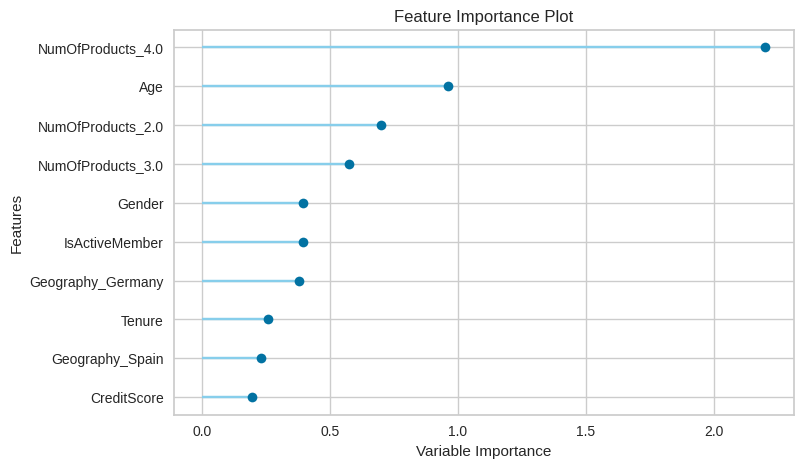

In [93]:
s.plot_model(best, plot = 'feature')

In [ ]:
s.save_model(best, 'model_svm')